In [103]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("../graphs.mplstyle")
from music21 import *
import pickle

In [104]:
identifier = "opus74"

excerpt = converter.parse(f"../Pickles/{identifier}_excerpt.xml")
phraseStack = pickle.load(open(f"../Pickles/{identifier}_phraseStack.pkl", "rb"))
flatStack = [phrase for phrases in phraseStack for phrase in phrases]
SimpleG = pickle.load(open(f"../Pickles/{identifier}_simpleGraph.pkl", "rb"))
ObjectG = pickle.load(open(f"../Pickles/{identifier}_objectGraph.pkl", "rb"))
df = pickle.load(open(f"../Pickles/{identifier}_df.pkl", "rb"))

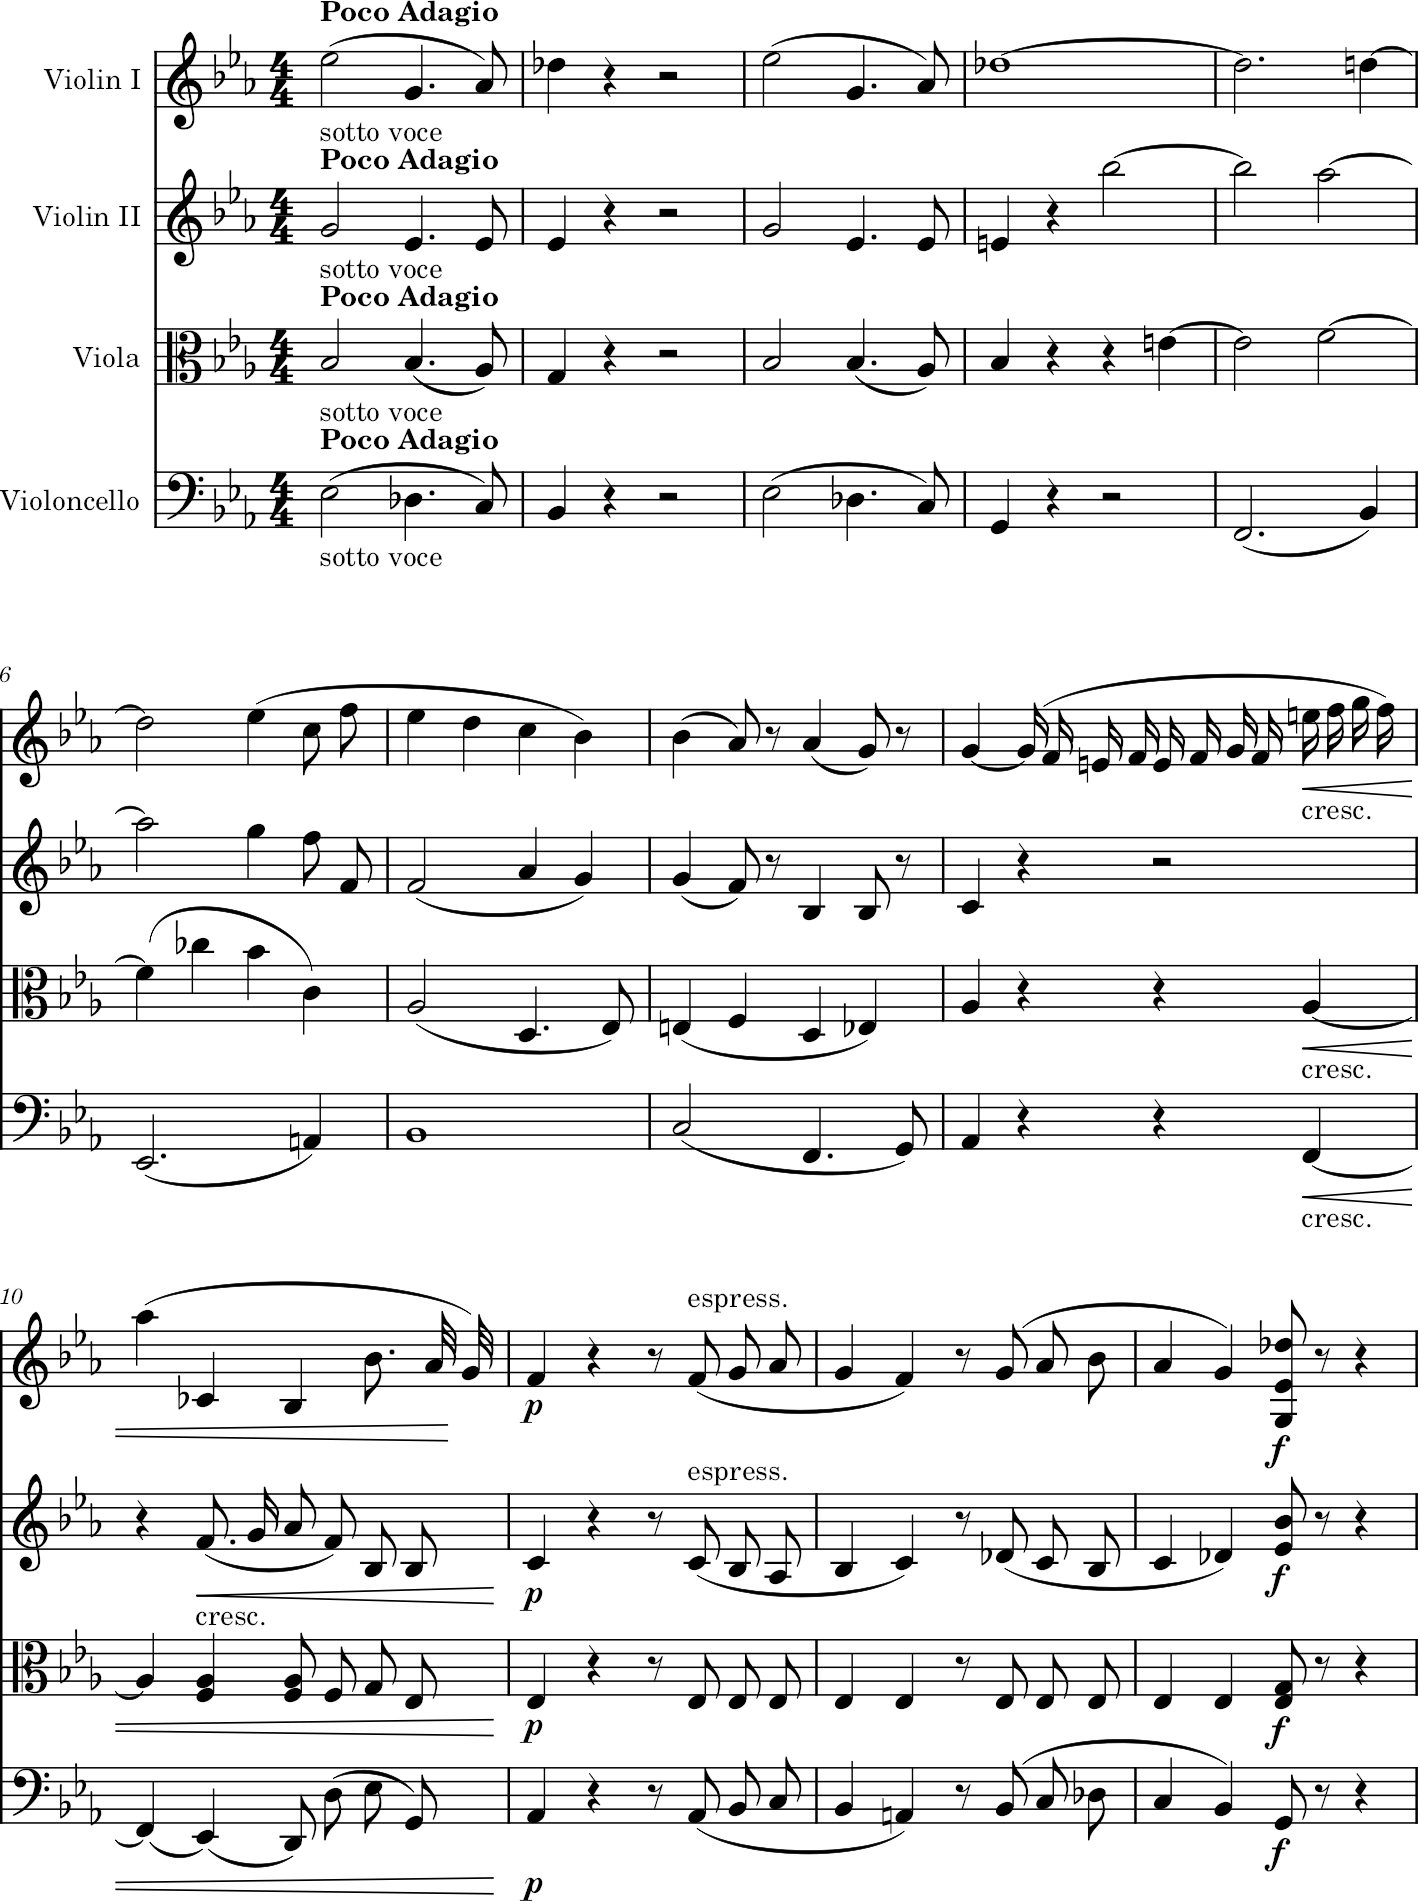

In [11]:
excerpt.metadata = metadata.Metadata()
excerpt.metadata.title = ""
excerpt.metadata.composer = ""
excerpt.show()
#excerpt.write(fmt="musicxml.png", fp="../Figures/excerpt.png", dpi=300)

c:\Users\Lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\drawing\nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


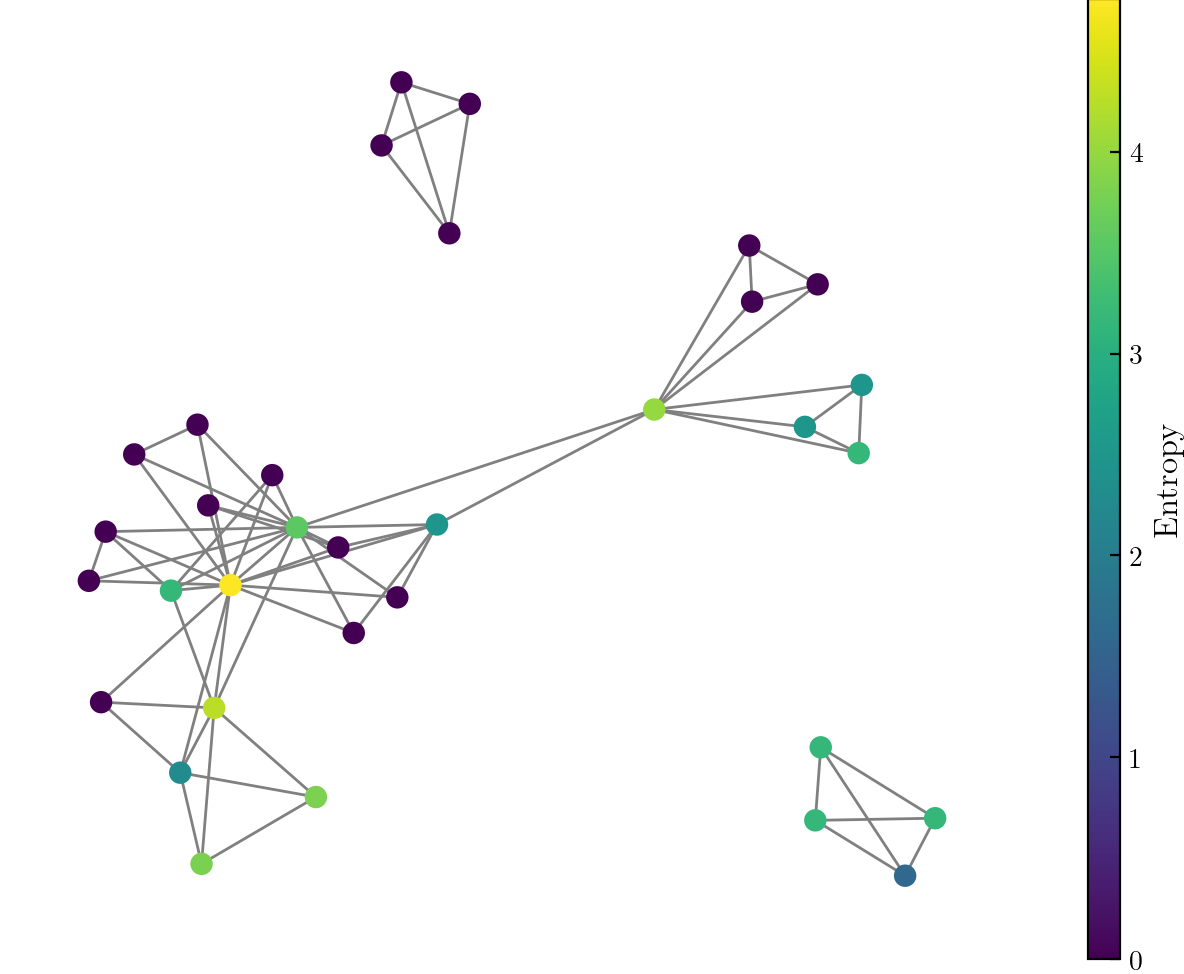

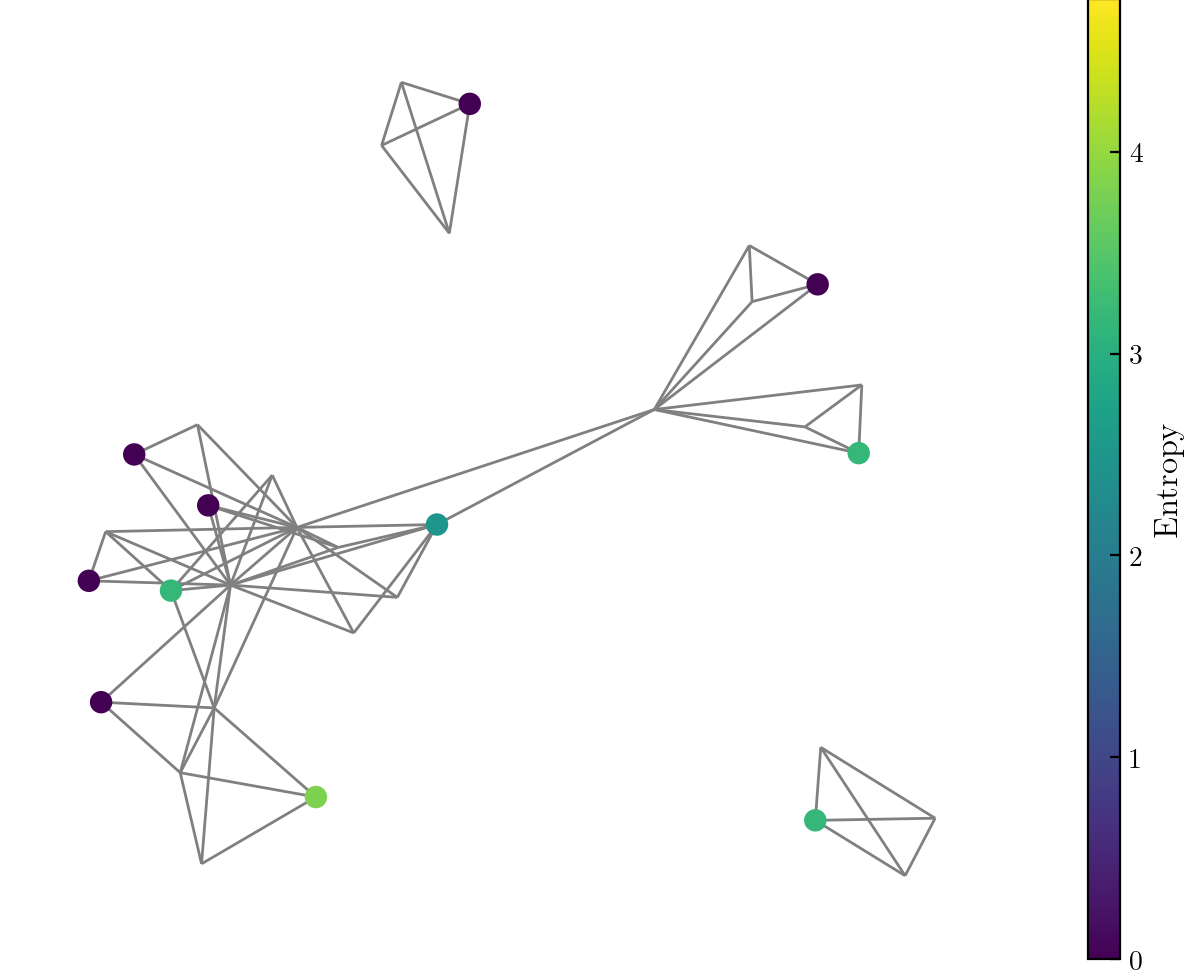

In [ ]:
# Draw graphs

sample = df["sample"][0]

chosen = [x for x in sample if sample[x] == 1]

for n in ObjectG.nodes:
    if n.id in chosen:
        n.sol = 1
    else:
        n.sol = 0

cmap = mpl.colormaps['viridis']
nodeSize = 50
edgeColor = "grey"
edgeWidth = 1

pos = nx.spring_layout(ObjectG, k=0.5, seed=9)

plt.figure(0)
nx.draw(ObjectG, pos, nodelist=[], edge_color=edgeColor, width=edgeWidth)
pc0 = nx.draw_networkx_nodes(ObjectG, pos, node_color=[n.entropy for n in ObjectG], cmap=cmap, node_size=nodeSize)
cb = plt.colorbar(pc0, label="Entropy", aspect=30)
#plt.gca().set_aspect('equal', "datalim")
plt.savefig("..\Figures\problemGraph.pdf", pad_inches=0, bbox_inches="tight")

plt.figure(1)
nx.draw(ObjectG, pos, nodelist=[], edge_color=edgeColor, width=edgeWidth)
nx.draw_networkx_nodes(ObjectG, pos, alpha=[n.sol for n in ObjectG], node_color=[n.entropy for n in ObjectG], cmap=cmap, node_size=nodeSize)
plt.colorbar(pc0, ax=plt.gca(), label="Entropy", aspect=30)
plt.savefig("..\Figures\solutionGraph.pdf", pad_inches=0, bbox_inches="tight")

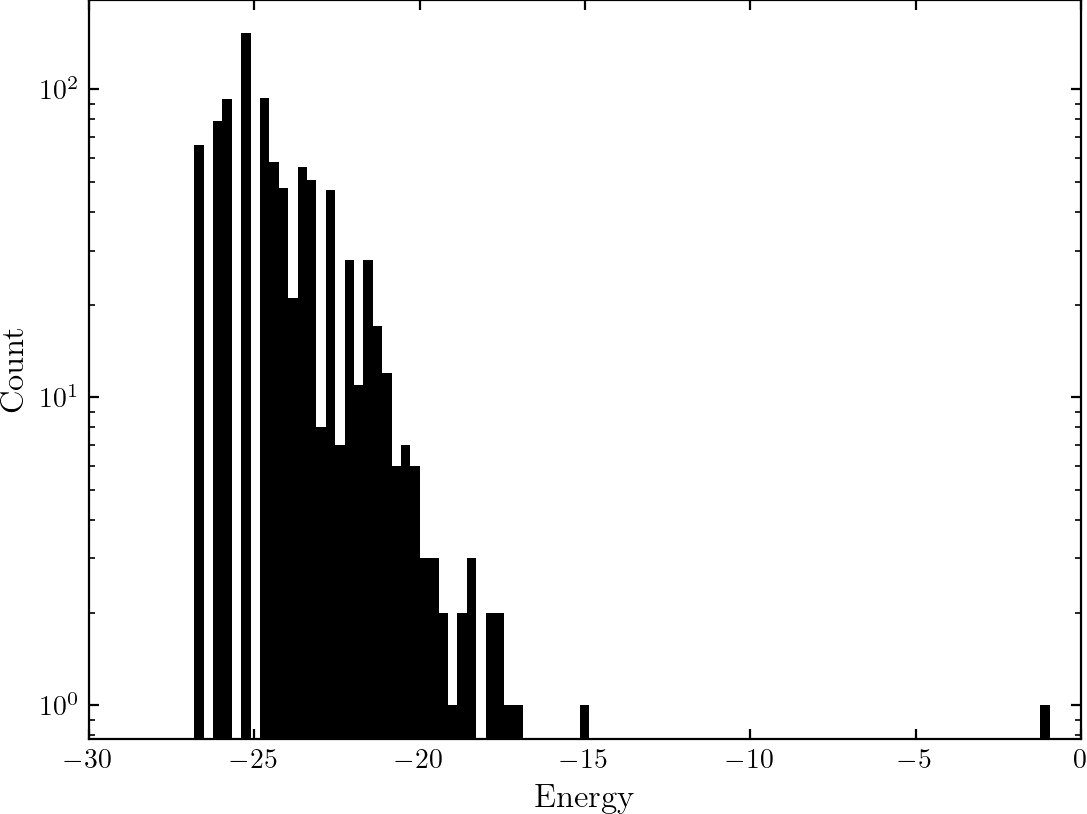

In [124]:
plt.hist(df["energy"], bins=200, log=True, color="black")
plt.xlabel("Energy")
plt.ylabel("Count")
plt.xlim(-30,0)
plt.savefig("..\Figures\histogram.pdf", pad_inches=0, bbox_inches="tight")

In [ ]:
class BoundaryStrengthAxis(graph.axis.Axis):
    labelDefault = 'Boundary strength'

    def __init__(self, client=None, axisName='y'):
        super().__init__(client, axisName)
        self.minValue = 0
        self.maxValue = 1

    def ticks(self):
        ticks = super().ticks()
        tickValues = [0,1]
        newTicks = [(0,0), (1,1)]
        return newTicks

    def extractOneElement(self, el, formatDict):
        if hasattr(el, 'boundaryStrength'):
            return el.boundaryStrength

viola = excerpt.parts[2]
plotS = graph.plot.Scatter(viola, marker="o")

plotS.axisX = graph.axis.OffsetAxis(plotS, 'x')
plotS.axisY = BoundaryStrengthAxis(plotS, 'y')
plotS.title = ""
plotS.figureSize = (6,4)

plotS.alpha = 1
plotS.doneAction = None
plotS.axisX.label = "Measure"
plotS.hideYGrid = True

plotS.run()

line = plt.hlines(0.4, 0, viola.quarterLength, linestyles=":", colors="black")
plotS.subplot.add_artist(line)
plotS.subplot.set_xlim(left=0, right=viola.quarterLength)
plotS.subplot.set_ylim(bottom=0, top=1)

#plotS.write()
#plotS.write(fp="..\\Figures\\boundary_offset.pdf")

In [ ]:
class EntropyAxis(graph.axis.Axis):
    labelDefault = 'Entropy'

    def extractOneElement(self, el, formatDict):
        if hasattr(el, 'name'):
            return noteEntropy(el)
        
plotS = graph.plot.Scatter(excerpt.parts[0])

plotS.title = 'Offset vs Entropy'
plotS.axisX = graph.axis.OffsetAxis(plotS, 'x')
plotS.axisY = EntropyAxis(plotS, 'y')

plotS.run()